<a href="https://colab.research.google.com/github/hncpyj/StockClosingPredict/blob/main/stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 기반 주가 예측

In [ ]:
# pip install finance-datareader

In [ ]:
# 주가 데이터 가져올 땐 해당 회사의 코드를 알아야 함

In [ ]:
import FinanceDataReader as fdr

In [ ]:
mc=fdr.DataReader(symbol='304670', start='20210217')

In [ ]:
mc

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-02-17,7605,7630,7565,7595,15457,0.012667
2021-02-18,7510,7540,7500,7540,18618,-0.007242
2021-02-19,7565,7605,7560,7605,11877,0.008621
2021-02-22,7680,7750,7680,7730,12509,0.016437
2021-02-23,7720,7735,7700,7735,23770,0.000647
...,...,...,...,...,...,...
2022-02-10,7655,7690,7625,7655,8786,0.001963
2022-02-11,7690,7770,7690,7765,11746,0.014370
2022-02-14,7755,7755,7715,7730,5642,-0.004507


In [ ]:
# apple=fdr.DataReader('AAPL', '1981')
# apple=fdr.DataReader('AAPL', '1981-1', '1985-12-31')

In [ ]:
# apple

In [ ]:
# AMZN 주가 예측

In [ ]:
amazon=fdr.DataReader('AMZN')

In [ ]:
amazon

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1997-05-15,1.96,2.44,2.50,1.93,72160000.0,-0.9962
1997-05-16,1.73,1.97,1.98,1.71,14700000.0,-0.1173
1997-05-19,1.71,1.76,1.77,1.62,6110000.0,-0.0116
1997-05-20,1.64,1.73,1.75,1.64,5470000.0,-0.0409
1997-05-21,1.43,1.64,1.65,1.37,18850000.0,-0.1280
...,...,...,...,...,...,...
2021-11-08,3488.98,3523.24,3579.00,3487.86,3060000.0,-0.0085
2021-11-09,3576.23,3515.25,3593.77,3501.43,4280000.0,0.0250
2021-11-10,3482.05,3563.87,3605.45,3463.09,3970000.0,-0.0263


In [ ]:
#mc로 변경
mc.describe()

,Open,High,Low,Close,Volume,Change
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,7529.596774,7544.637097,7499.193548,7521.713710,9716.887097,0.000222
std,297.609638,301.495714,296.881829,300.806586,10147.273974,0.008505
min,6950.000000,6965.000000,6940.000000,6965.000000,40.000000,-0.023102
25%,7270.000000,7285.000000,7243.750000,7255.000000,3452.750000,-0.005061
50%,7472.500000,7490.000000,7440.000000,7455.000000,7185.000000,-0.000650
75%,7820.000000,7841.250000,7795.000000,7817.500000,12002.000000,0.005143
max,8155.000000,8160.000000,8090.000000,8145.000000,86815.000000,0.025000


In [ ]:
mc['Close']

Date
2021-02-17    7595
2021-02-18    7540
2021-02-19    7605
2021-02-22    7730
2021-02-23    7735
              ... 
2022-02-10    7655
2022-02-11    7765
2022-02-14    7730
2022-02-15    7745
2022-02-16    7855
Name: Close, Length: 248, dtype: int64

In [ ]:
#시간의 흐름에 따른 종가의 변화 확인

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

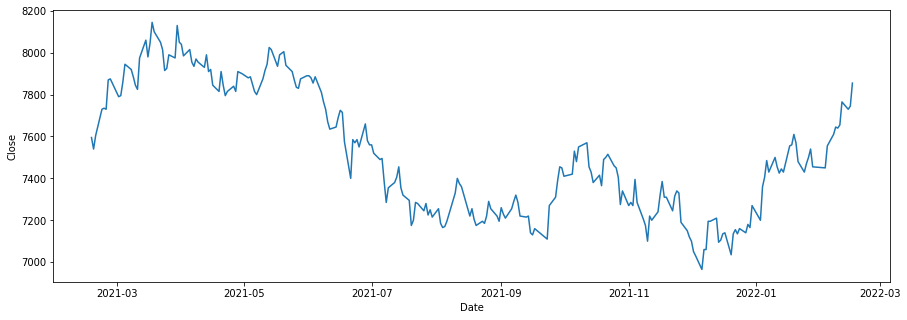

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=mc.index,y=mc['Close'])

In [ ]:
# LSTM 사실 알고보면 잘못된 모델.. 맹신 x


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mc.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [ ]:
mms=MinMaxScaler()
az_scaled=mms.fit_transform(mc[['Open', 'High', 'Low', 'Close', 'Volume']])

In [ ]:
az_scaled

array([[0.54356846, 0.55648536, 0.54347826, 0.53389831, 0.17766638],
       [0.46473029, 0.48117155, 0.48695652, 0.48728814, 0.21409392],
       [0.51037344, 0.53556485, 0.53913043, 0.54237288, 0.13641026],
       ...,
       [0.66804979, 0.66108787, 0.67391304, 0.64830508, 0.06455776],
       [0.65975104, 0.65271967, 0.68695652, 0.66101695, 0.03021608],
       [0.72614108, 0.74476987, 0.76956522, 0.75423729, 0.1028983 ]])

In [ ]:
az_scaled=pd.DataFrame(az_scaled)

In [ ]:
az_scaled.columns=['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
az_scaled

,Open,High,Low,Close,Volume
0,0.543568,0.556485,0.543478,0.533898,0.177666
1,0.464730,0.481172,0.486957,0.487288,0.214094
2,0.510373,0.535565,0.539130,0.542373,0.136410
3,0.605809,0.656904,0.643478,0.648305,0.143693
4,0.639004,0.644351,0.660870,0.652542,0.273466
...,...,...,...,...,...
243,0.585062,0.606695,0.595652,0.584746,0.100789
244,0.614108,0.673640,0.652174,0.677966,0.134901
245,0.668050,0.661088,0.673913,0.648305,0.064558
246,0.659751,0.652720,0.686957,0.661017,0.030216


In [ ]:
# az_scaled.columns={['Open']:1} #이런식으로 하는게 있었는데..에러남

In [ ]:
# 학습데이터 : 과거 ~300일 이전까지의 데이터
# 테스트데이터 : 300일 전~ 현재까지의 데이터
train=az_scaled[:-300]
test=az_scaled[-300:]

In [ ]:
test

,Open,High,Low,Close,Volume
0,0.543568,0.556485,0.543478,0.533898,0.177666
1,0.464730,0.481172,0.486957,0.487288,0.214094
2,0.510373,0.535565,0.539130,0.542373,0.136410
3,0.605809,0.656904,0.643478,0.648305,0.143693
4,0.639004,0.644351,0.660870,0.652542,0.273466
...,...,...,...,...,...
243,0.585062,0.606695,0.595652,0.584746,0.100789
244,0.614108,0.673640,0.652174,0.677966,0.134901
245,0.668050,0.661088,0.673913,0.648305,0.064558
246,0.659751,0.652720,0.686957,0.661017,0.030216


In [ ]:
# window_size를 30으로 설정, 30일동안의 주가 데이터 -> 다음날 주가 종가 예측
window_size=30

In [ ]:
train

,Open,High,Low,Close,Volume


In [ ]:
train.columns
train_feature=train[['Open', 'High', 'Low', 'Volume']]

In [ ]:
train_label=train[['Close']]

In [ ]:
# 30일동안의 데이터로 설계
# 훈련 데이터를 위도우 크기에 따라 재구성

In [ ]:
len(train_feature)
train_feature.iloc[0:0+30]
train_feature.iloc[1:1+30]
# train_feature.iloc[2:2+30]
# train_feature.iloc[3:3+30]
# train_feature.iloc[5838:5838+30]

,Open,High,Low,Volume


In [ ]:
#train_feature.iloc[i:i+window_size]

In [ ]:
feature_list=[]
label_list=[]

In [ ]:
for i in range(len(train_feature) -window_size): #0~5670-1까지 반복
    feature_list.append(np.array(train_feature.iloc[i:i+window_size]))
    label_list.append(np.array(train_label.iloc[i+window_size]))

In [ ]:
feature_list=np.array(feature_list)
label_list=np.array(label_list)

In [ ]:
feature_list

array([], dtype=float64)

In [ ]:
label_list

array([], dtype=float64)

In [ ]:
len(feature_list)

0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train. valid set 생성
xtrain, xvalid, ytrain, yvalid=train_test_split(feature_list, label_list, test_size=0.2)

In [ ]:
xtrain

array([[[0.09891965, 0.09960096, 0.10005384, 0.02216089],
        [0.0999548 , 0.09997481, 0.10060851, 0.02216089],
        [0.10084016, 0.1011653 , 0.10165291, 0.02880107],
        ...,
        [0.10074921, 0.10083918, 0.10109283, 0.01686799],
        [0.09965789, 0.09910779, 0.10037041, 0.01677175],
        [0.09997352, 0.10050245, 0.09983468, 0.0283199 ]],

       [[0.10058338, 0.09977861, 0.09953435, 0.02533663],
        [0.09875381, 0.09860667, 0.09874429, 0.01937009],
        [0.09827502, 0.09917673, 0.0990852 , 0.02235336],
        ...,
        [0.10196892, 0.10131378, 0.10094672, 0.03226551],
        [0.1008776 , 0.10353568, 0.1016502 , 0.04362119],
        [0.10429066, 0.10424096, 0.10430178, 0.03996428]],

       [[0.01098542, 0.0113163 , 0.01107711, 0.07480118],
        [0.01129838, 0.01126062, 0.0112151 , 0.04467977],
        [0.01092123, 0.01090798, 0.0109283 , 0.05911495],
        ...,
        [0.01267055, 0.01313783, 0.01272758, 0.0684497 ],
        [0.01326436, 0.013387

In [ ]:
np.shape(xtrain) #(4670, 30, 4)
np.shape(xvalid) #(1168, 30, 4)

(1168, 30, 4)

In [ ]:
#LSTMd 에서는 array 형태여야 한다(list x)

In [ ]:
test

,Open,High,Low,Close,Volume
5868,0.840582,0.861553,0.846528,0.844084,0.053918
5869,0.856360,0.875431,0.861409,0.875925,0.045257
5870,0.884240,0.887815,0.857499,0.850858,0.046604
5871,0.857885,0.852671,0.834076,0.835070,0.044295
5872,0.848322,0.844730,0.837328,0.831518,0.038906
...,...,...,...,...,...
6163,0.942021,0.948562,0.943354,0.935006,0.024759
6164,0.939884,0.952478,0.947025,0.958397,0.036500
6165,0.952889,0.955575,0.936652,0.933148,0.033517
6166,0.939282,0.939081,0.937837,0.930587,0.016676


In [ ]:
xvalid

array([[[0.14780706, 0.14937095, 0.14913783, 0.03524879],
        [0.14841959, 0.15319961, 0.15008212, 0.04381366],
        [0.15522965, 0.15472419, 0.1548712 , 0.03938687],
        ...,
        [0.15977949, 0.15859527, 0.15903255, 0.02601027],
        [0.15859188, 0.15813392, 0.15901091, 0.0202362 ],
        [0.15907869, 0.1597619 , 0.16060997, 0.02129478]],

       [[0.00997435, 0.00995612, 0.00986766, 0.04390989],
        [0.00965337, 0.00959818, 0.00958086, 0.08298111],
        [0.00943671, 0.0095531 , 0.00954839, 0.05401452],
        ...,
        [0.01055211, 0.01053943, 0.01057656, 0.03419021],
        [0.01037289, 0.01036444, 0.01013823, 0.08067149],
        [0.01003052, 0.0101099 , 0.00994884, 0.06941205]],

       [[0.07770844, 0.078074  , 0.07716368, 0.04862539],
        [0.07826213, 0.07809786, 0.07724755, 0.03784712],
        [0.07619718, 0.07671647, 0.07682546, 0.02880107],
        ...,
        [0.10090435, 0.10049714, 0.10142292, 0.01378848],
        [0.10053523, 0.102451

In [ ]:
test

,Open,High,Low,Close,Volume
5868,0.840582,0.861553,0.846528,0.844084,0.053918
5869,0.856360,0.875431,0.861409,0.875925,0.045257
5870,0.884240,0.887815,0.857499,0.850858,0.046604
5871,0.857885,0.852671,0.834076,0.835070,0.044295
5872,0.848322,0.844730,0.837328,0.831518,0.038906
...,...,...,...,...,...
6163,0.942021,0.948562,0.943354,0.935006,0.024759
6164,0.939884,0.952478,0.947025,0.958397,0.036500
6165,0.952889,0.955575,0.936652,0.933148,0.033517
6166,0.939282,0.939081,0.937837,0.930587,0.016676


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# test data 도 x, y값 나눠주기
test_feature=test[['Open', 'High', 'Low', 'Volume']]
test_label=test[['Close']]

In [ ]:
feature_test=[]
label_test=[]
for i in range(len(test_feature)-window_size): #0~5670-1까지 반복
    feature_test.append(np.array(test_feature.iloc[i:i+window_size]))
    label_test.append(np.array(test_label.iloc[i+window_size]))

In [ ]:
np.shape(feature_test) #(270, 30, 4)
# 4종류 30줄로 구성된 데이터가 270개 있다.
np.shape(label_test) #(270, 30, 1)
# 여러 개의 x값을 넣었을 때 하나의 y 값이 output되는 모델을 만드는 것이므로
# label_test (y)의 값의 shape는
# (270, 1) 이 되어야 한다.
np.shape(yvalid)

(1168, 1)

In [ ]:
label_test

[array([0.86209152]),
 array([0.85349369]),
 array([0.85120415]),
 array([0.85871083]),
 array([0.85941861]),
 array([0.88067592]),
 array([0.84755269]),
 array([0.86048295]),
 array([0.81360372]),
 array([0.80511312]),
 array([0.81689057]),
 array([0.86856604]),
 array([0.8902389]),
 array([0.88738904]),
 array([0.84244814]),
 array([0.81330077]),
 array([0.84074574]),
 array([0.83347766]),
 array([0.83844547]),
 array([0.83904869]),
 array([0.84028193]),
 array([0.83218544]),
 array([0.83528462]),
 array([0.83056078]),
 array([0.83029]),
 array([0.83556344]),
 array([0.85352854]),
 array([0.85628189]),
 array([0.84896287]),
 array([0.86291458]),
 array([0.85847759]),
 array([0.85397358]),
 array([0.84749907]),
 array([0.84627119]),
 array([0.85144276]),
 array([0.83184764]),
 array([0.8311211]),
 array([0.83512377]),
 array([0.84599505]),
 array([0.84818003]),
 array([0.86851242]),
 array([0.86720411]),
 array([0.85797357]),
 array([0.85918805]),
 array([0.8592792]),
 array([0.853582

In [ ]:
feature_test=np.array(feature_test)
label_test=np.array(label_test)

# LSTM 설계시 usually 'window_sliding' 사용해서 input 한다.

In [ ]:
np.shape(xtrain)

(4670, 30, 4)

In [ ]:
# activation 시도 종류 : tanh, relu, linear
# activation default로 tanh가 설정되어 있음
# 실행할때마다 학습한거 위에 다시 학습해서 뭔가 바꾸고 새로 돌리고싶을 땐 시퀀셜 꼭 다시 돌려줘야 한다 그래서 같이 넣어줌
model=Sequential()
# units : LSTM에서의 output
model.add(LSTM(16,
              input_shape=(np.shape(xtrain)[1],np.shape(xtrain)[2]),return_sequences=False))

In [ ]:
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
#줄어들지 않고 반복되는걸 몇번 참을거냐 10번 지나도 안줄어들면 중단
es=EarlyStopping(monitor='val_loss', patience=30)
# val_loss의 값이 가장 좋을 때 베스트를 저장한다.
cp=ModelCheckpoint('tmp_cp.h5',
                  monitor='val_loss', 
                   save_best_only=True)

In [ ]:
model.fit(xtrain, ytrain,
         epochs=100,
         batch_size=16,
         validation_data=(xvalid, yvalid),
         callbacks=[es,cp])

Epoch 1/300
292/292 [==============================] - 5s 11ms/step - loss: 0.0013 - val_loss: 7.8172e-05
Epoch 2/300
292/292 [==============================] - 3s 9ms/step - loss: 7.6155e-05 - val_loss: 5.8697e-05
Epoch 3/300
292/292 [==============================] - 3s 9ms/step - loss: 6.6134e-05 - val_loss: 5.1670e-05
Epoch 4/300
292/292 [==============================] - 3s 10ms/step - loss: 5.9023e-05 - val_loss: 4.4249e-05
Epoch 5/300
292/292 [==============================] - 3s 10ms/step - loss: 5.3819e-05 - val_loss: 5.5587e-05
Epoch 6/300
292/292 [==============================] - 3s 10ms/step - loss: 4.7792e-05 - val_loss: 3.7310e-05
Epoch 7/300
292/292 [==============================] - 3s 10ms/step - loss: 4.5702e-05 - val_loss: 4.2146e-05
Epoch 8/300
292/292 [==============================] - 3s 9ms/step - loss: 5.0099e-05 - val_loss: 3.2296e-05
Epoch 9/300
292/292 [==============================] - 3s 9ms/step - loss: 4.3430e-05 - val_loss: 3.7172e-05
Epoch 10/300
292/2

292/292 [==============================] - 3s 9ms/step - loss: 2.0689e-05 - val_loss: 1.9499e-05
Epoch 76/300
292/292 [==============================] - 3s 9ms/step - loss: 2.1567e-05 - val_loss: 1.7046e-05
Epoch 77/300
292/292 [==============================] - 3s 9ms/step - loss: 2.1268e-05 - val_loss: 1.6337e-05
Epoch 78/300
292/292 [==============================] - 3s 9ms/step - loss: 2.1172e-05 - val_loss: 1.5915e-05
Epoch 79/300
292/292 [==============================] - 3s 9ms/step - loss: 2.0814e-05 - val_loss: 1.9973e-05
Epoch 80/300
292/292 [==============================] - 3s 9ms/step - loss: 2.1424e-05 - val_loss: 1.8873e-05
Epoch 81/300
292/292 [==============================] - 3s 9ms/step - loss: 2.1240e-05 - val_loss: 1.6544e-05
Epoch 82/300
292/292 [==============================] - 3s 9ms/step - loss: 2.0117e-05 - val_loss: 1.3689e-05
Epoch 83/300
292/292 [==============================] - 3s 9ms/step - loss: 2.0680e-05 - val_loss: 2.3221e-05
Epoch 84/300
292/292 [=

In [ ]:
xtrain.shape
# window, data가 크면 연산량이 많다.

(4670, 30, 4)

In [ ]:
pred=model.predict(feature_test)

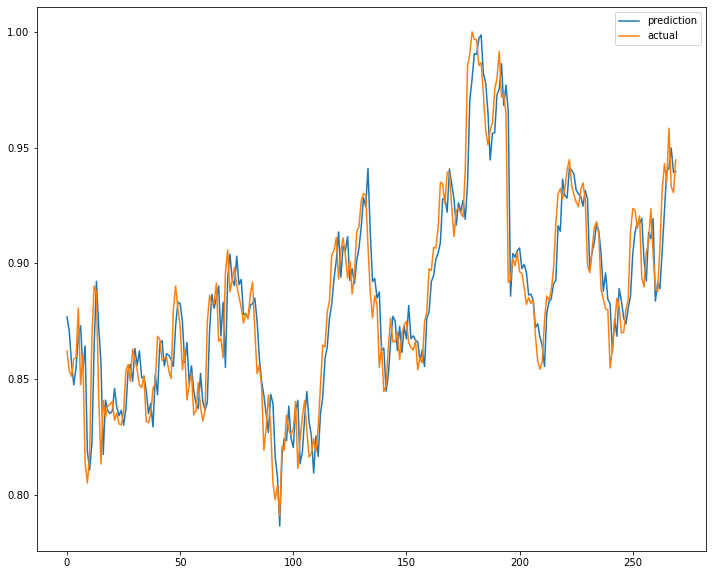

In [ ]:
pred
label_test
plt.figure(figsize=(12,10))
plt.plot(pred, label='prediction')
plt.plot(label_test, label='actual')
plt.legend()

In [ ]:
# timesteps:30
# input : [batch, timesteps, feature]
# batch=1이면 생략 가능